In [1]:
## 단순히 URL 을 입력하면 Hello World 를 볼 수 있는 가장 간단한 형태의 서버입니다.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Apr/2022 17:27:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Apr/2022 17:27:38] "GET /favicon.ico HTTP/1.1" 404 -


In [1]:
from flask import Flask
app = Flask(__name__)

@app.route("/")
def hello():
    return "Hello World!"

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Jun/2022 18:22:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2022 18:22:42] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
## 특정 URL에 대한 요청을 처리합니다.

In [2]:
from flask import Flask
app = Flask(__name__)

@app.route('/flask')
def hello_flask():
    return 'Hello Flask'

@app.route('/python/')
def hello_python():
    return 'Hello Python'

@app.route('/')
def flask_home():
    return '가즈아'

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Jun/2022 18:40:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2022 18:40:52] "GET /flask HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2022 18:42:01] "GET /python HTTP/1.1" 308 -
127.0.0.1 - - [11/Jun/2022 18:42:01] "GET /python/ HTTP/1.1" 200 -


In [ ]:
## 가변 인자 처리하기

In [3]:
from flask import Flask
app = Flask(__name__)

@app.route('/hello/<name>')
def hello_name(name):
    return 'Hello %s!' % name

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Jun/2022 18:46:26] "GET //hello/test HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2022 18:46:41] "GET //hello/eddi HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2022 18:46:52] "GET //hello/3 HTTP/1.1" 200 -


In [ ]:
## 웹 요청 처리하기

In [4]:
from flask import Flask, redirect, url_for, request
app = Flask(__name__)

@app.route('/success')
def success():
    return 'welcome !!!'

@app.route('/login',methods = ['POST', 'GET'])
def login():
    if request.method == 'POST':
        return redirect(url_for('success'))
    else:
        return redirect(url_for('success'))

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Jun/2022 18:53:54] "GET /login HTTP/1.1" 302 -
127.0.0.1 - - [11/Jun/2022 18:53:54] "GET /success HTTP/1.1" 200 -


In [ ]:
## vue 환경을 구축합니다.
## 필요에 따라 vscode 를 설치합니다.

In [ ]:
## 준비되어 있는 vue 를 구동시켜봅시다.

In [13]:
## npm install
## 이후 npm run serve

In [5]:
from flask import Flask, url_for, request, jsonify
from flask_cors import CORS, cross_origin

import json

app = Flask(__name__)
CORS(app)

@app.route('/vueMember/register',methods = ['POST'])
def register():
    # 낮은 버전의 파이썬
    params = json.loads(request.get_data(), encoding='utf-8')
    # 최신 버전의 파이썬 3.9
    #params = json.loads(request.get_data())
    print("params: ", params)
        
    if len(params) == 0:
        return jsonify("No Parameter")
    
    for key in params.keys():
        print("params[key]: ", params[key], " key: ", key)
        
    send_string = params.get('id') + " 님 가입이 완료되었습니다!"
    print(send_string)
    
    return jsonify(send_string)

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Jun/2022 19:08:34] "OPTIONS /vueMember/register HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2022 19:08:34] "POST /vueMember/register HTTP/1.1" 200 -


params:  {'id': 'hello', 'pw': 'hello'}
params[key]:  hello  key:  id
params[key]:  hello  key:  pw
hello 님 가입이 완료되었습니다!


In [ ]:
## 이번에는 DB에 데이터를 넣어보자!!!

In [ ]:
## 먼저 Ubuntu에 MySQL을 설치한다.
# 소프트웨어 패키지 업데이트
!sudo apt-get update

In [ ]:
# 설치
!sudo apt-get install mysql-server

In [ ]:
# 방화벽 해제
!sudo ufw allow mysql

In [ ]:
# MySQL 서비스 재시작(스펙이 떨어지는 경우 권장하지 않음)
#!sudo systemctl enable mysql

In [ ]:
# 파이썬 패키지 설치
!pip install pymysql

In [6]:
import pymysql

In [7]:
MYSQL_USER_DATA_SAVED_FILE = "res/mysql/userinfo"

In [8]:
# Linux
!mkdir -p res/mysql/

# Windows
#!mkdir res\mysql

In [9]:
!ls

python_snippets.ipynb  res


In [ ]:
# mysql 계정을 만들어야함
# sudo mysql -u root -p
# create schema `pydb` default character set utf8;
# create user eddi@localhost identified by 'eddi@123';
# grant all privileges on pydb.* to eddi@localhost;
# flush privileges;

In [10]:
import pickle

mysql_user_info = dict({
    'user_id': 'eddi',
    'password': 'eddi@123'
})

f = open(MYSQL_USER_DATA_SAVED_FILE, 'wb')
pickle.dump(mysql_user_info, f)
f.close()

del mysql_user_info

In [12]:
!ls res/mysql

userinfo


In [14]:
import pickle

f = open(MYSQL_USER_DATA_SAVED_FILE, 'rb')
mysql_user_info = pickle.load(f)
f.close()

In [ ]:
# 전용 스키마를 생성해야 한다.
# create schema `pydb` default character set utf8mb4;
# grant all privileges on pydb.* to eddi@localhost;
# flush privileges;

In [16]:
# DB 연결
db = pymysql.connect(
    # localhost와 같은 아이피 주소임
    host = '127.0.0.1',
    # MySQL의 포트 번호
    port = 3306,
    # 아뒤
    user = mysql_user_info['user_id'],
    # 비번
    passwd = mysql_user_info['password'],
    # 사용하려는 스키마
    db = 'pydb'
)

print(db)

In [17]:
# 이제 DB에서 select 등을 수행했을때
# 나오는 결과를 순회할 수 있도록 지원하는 객체를 가져온다.
cursor = db.cursor()

print(cursor)

In [18]:
# MySQL 수동 쿼리를 적용하여 table을 생성해보도록 한다.
sql = """
    create table pydbtest(
        id int unsigned not null auto_increment,
        name varchar(20) not null,
        price int not null,
        primary key(id)
    )
"""

# 실제 SQL Query를 실행하는 코드
cursor.execute(sql)

# 작업한 내용을 실제 DB에 적용함
db.commit()

# 작업 완료 이후 DB 연결을 끊는다.
db.close()

print("테이블 생성 성공!")

테이블 생성 성공!


In [19]:
# insert 처리
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    insert into pydbtest(name, price) values (%s, %s)
"""

# %s에 해당하는 데이터들을 배치한다.
cursor.execute(sql, ('Xeon Server', 10000000))
cursor.execute(sql, ('FPGA Server', 34000000))
cursor.execute(sql, ('GPU Server', 20000000))
cursor.execute(sql, ('RTX 3090', 4000000))

db.commit()

db.close()

print("테이블에 값 넣기 성공!")

테이블에 값 넣기 성공!


In [20]:
# select(값 가져오기)
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다.
rows = cursor.fetchall()
print(rows)

db.close()

print("데이터 불러오기 성공!")

((1, 'Xeon Server', 10000000), (2, 'FPGA Server', 34000000), (3, 'GPU Server', 20000000), (4, 'RTX 3090', 4000000))
데이터 불러오기 성공!


In [52]:
# select(값 가져오기) 낱개로 가져오기
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다.
rows = cursor.fetchall()

for row in rows:
    print(row)

db.close()

print("데이터 낱개로 불러오기 성공!")

(1, 'Xeon Server', 10000000)
(2, 'FPGA Server', 34000000)
(3, 'GPU Server', 20000000)
(4, 'RTX 3090', 4000000)
데이터 낱개로 불러오기 성공!


In [21]:
# 낱개 내에서 각각의 데이터를 얻기(딕셔너리 형식이라 키값으로 뽑으면 됨)
# select(값 가져오기) 낱개로 가져오기
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor(pymysql.cursors.DictCursor)

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다.
rows = cursor.fetchall()

for row in rows:
    print('id: ', row['id'], ', name: ', row['name'], ', price: ', row['price'])

db.close()

print("데이터 낱개로 불러와 특정값 추출하기 성공!")

id:  1 , name:  Xeon Server , price:  10000000
id:  2 , name:  FPGA Server , price:  34000000
id:  3 , name:  GPU Server , price:  20000000
id:  4 , name:  RTX 3090 , price:  4000000
데이터 낱개로 불러와 특정값 추출하기 성공!


In [22]:
# 입력한 데이터값 정리하기(테이블 삭제)
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    drop table pydbtest;
"""

cursor.execute(sql)

db.commit()
db.close()

print("테이블 삭제 성공!")

테이블 삭제 성공!


In [2]:
import pickle
import pymysql

MYSQL_USER_DATA_SAVED_FILE = "res/mysql/userinfo"

f = open(MYSQL_USER_DATA_SAVED_FILE, 'rb')
mysql_user_info = pickle.load(f)
f.close()

In [3]:
# 소수점 데이터 처리하기!
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    create table power_data(
        no integer not null auto_increment primary key,
        voltage float not null,
        current float not null,
        vendor text null,
        name text not null,
        reg_date timestamp not null default now()
    )
"""

cursor.execute(sql)
db.commit()
db.close()

print("float 형식의 테이블 생성 성공!")

float 형식의 테이블 생성 성공!


In [4]:
import time
import math
import calendar
import datetime
import numpy as np

In [5]:
sample_time = np.arange(0, 10, 0.001)

print(sample_time)

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]


In [7]:
print(sample_time.size)

10000


In [8]:
# 가우시안 분포(정규 분포) 형식을 따르는 랜덤을 만듬
# 용어 필요 없고 데이터 개수에 따른 랜덤을 적절하게 만들어줌(자연스럽게)
noise = np.random.normal(size = len(sample_time))

print(noise)

[-0.65622324  1.88266491  0.38587387 ...  0.53810375 -0.53637159
 -1.06472653]


In [9]:
# 2 * pi * f = w = 5 ===> f = 5 / (2 * pi)
voltage = 3 * np.cos(5 * sample_time) + noise
current = 3 * np.sin(3 * sample_time + (math.pi / 3)) + noise

print(voltage)
print(current)

[2.34377676 4.88262741 3.38572387 ... 3.42086974 2.35051064 1.82619977]
[ 1.94185297  4.48522942  2.99290326 ... -0.56832776 -1.63443259
 -2.15440714]


In [ ]:
!pip install matplotlib

In [10]:
import matplotlib.pyplot as plt

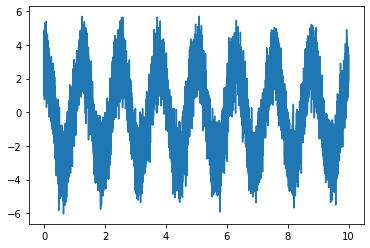

In [11]:
plt.plot(sample_time, voltage)
plt.show()

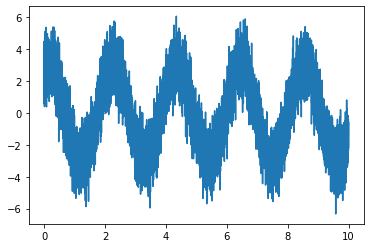

In [12]:
plt.plot(sample_time, current)
plt.show()

In [13]:
# 현재 시간값을 컴퓨터가 계산하고 있는 수치로 가져옴
ts = calendar.timegm(time.gmtime())

print(ts)

# sample_time이 이미 1000개짜리 배열이므로
# 곱셈을 수행할 경우 알아서 1000개 배열에 1000씩 곱해짐(자동으로)
# 샘플 타임이 0.001초(1 / 1000 초)를 대상으로 하고 있음
# 전체 샘플 타임의 개수는 10000개(만개)이므로 1 / 1000 초 단위 샘플링을 하면
# 10000 / 1000 = 10초간의 데이터를 수집함을 의미함
ts = (sample_time * 1000) + ts

print(ts)

1655544361
[1.65554436e+09 1.65554436e+09 1.65554436e+09 ... 1.65555436e+09
 1.65555436e+09 1.65555436e+09]


In [14]:
# 실제 db에 넣기 위해 상호간의 데이터 타입을 np.float32로 맞춰줌(이것을 해줘야 DB에 입력 가능함)
sample_time = np.array(sample_time, dtype=np.float32)
voltage = np.array(voltage, dtype=np.float32)
current = np.array(current, dtype=np.float32)

In [15]:
curr_time = []

# datetime.datetime을 통해 시간값을 제어할 수 있으며
# datetime.datetime.fromtimestamp(컴퓨터시간).strftime(형식)을 통해
# 원하는 형태로 시간을 형 변환할 수 있음
for i in range(len(sample_time)):
    curr_time.append(
        datetime.
            datetime.
                fromtimestamp(ts[i]).
                    strftime('%Y-%m-%d %H:%M:%S')
    )
    
print(curr_time)

['2022-06-18 18:26:01', '2022-06-18 18:26:02', '2022-06-18 18:26:03', '2022-06-18 18:26:04', '2022-06-18 18:26:05', '2022-06-18 18:26:06', '2022-06-18 18:26:07', '2022-06-18 18:26:08', '2022-06-18 18:26:09', '2022-06-18 18:26:10', '2022-06-18 18:26:11', '2022-06-18 18:26:12', '2022-06-18 18:26:13', '2022-06-18 18:26:14', '2022-06-18 18:26:15', '2022-06-18 18:26:16', '2022-06-18 18:26:17', '2022-06-18 18:26:18', '2022-06-18 18:26:19', '2022-06-18 18:26:20', '2022-06-18 18:26:21', '2022-06-18 18:26:22', '2022-06-18 18:26:23', '2022-06-18 18:26:24', '2022-06-18 18:26:25', '2022-06-18 18:26:26', '2022-06-18 18:26:27', '2022-06-18 18:26:28', '2022-06-18 18:26:29', '2022-06-18 18:26:30', '2022-06-18 18:26:31', '2022-06-18 18:26:32', '2022-06-18 18:26:33', '2022-06-18 18:26:34', '2022-06-18 18:26:35', '2022-06-18 18:26:36', '2022-06-18 18:26:37', '2022-06-18 18:26:38', '2022-06-18 18:26:39', '2022-06-18 18:26:40', '2022-06-18 18:26:41', '2022-06-18 18:26:42', '2022-06-18 18:26:43', '2022-06-1

In [16]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

# 소수점 형식의 데이터와 현재 시간값을 기록하도록 한다.
sql = """
    insert into power_data(
        voltage, current, vendor, name, reg_date
    ) values(
        %s, %s, %s, %s, %s
    )
"""

# volt, curr이 np.float32
# DB에 넣는 과정은 %s(문자열) 형식이므로 반드시 str()로 한 번 감싸줘야함
try:
    with db.cursor() as cursor:
        for i in range(len(sample_time)):
            cursor.execute(sql,
                (
                    str(voltage[i]),
                    str(current[i]),
                    'EDDI',
                    'P32N21BTN77PW',
                    curr_time[i]
                )
            )
            
        db.commit()
finally:
    db.close()
    
print('소수점 형식 데이터 및 날자 형식 데이터 입력 완료!')

소수점 형식 데이터 및 날자 형식 데이터 입력 완료!


In [ ]:
## 회원 가입

In [70]:
# 회원 테이블 생성
db = pymysql.connect(
    # localhost와 같은 아이피 주소임
    host = '127.0.0.1',
    # MySQL의 포트 번호
    port = 3306,
    # 아뒤
    user = mysql_user_info['user_id'],
    # 비번
    passwd = mysql_user_info['password'],
    # 사용하려는 스키마
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    create table member(
        no int unsigned not null auto_increment,
        id varchar(20) not null,
        pw varchar(20) not null,
        primary key(no)
    )
"""

# 실제 SQL Query를 실행하는 코드
cursor.execute(sql)

# 작업한 내용을 실제 DB에 적용함
db.commit()

# 작업 완료 이후 DB 연결을 끊는다.
db.close()

print("회원 테이블 생성 성공!")

회원 테이블 생성 성공!


In [ ]:
from flask import Flask, url_for, request, jsonify
from flask_cors import CORS, cross_origin

import json

app = Flask(__name__)
CORS(app)

session = {}

# 검증 필요
@app.route('/login', methods = ['POST'])
def login():
    params = json.loads(request.get_data(), encoding='utf-8')
    session['id'] = params.get('id')

# 검증 필요
@app.route('/logout')
def logout():
    params = json.loads(request.get_data(), encoding='utf-8')
    session.pop(params.get('id'), None)

@app.route('/vueMember/register',methods = ['POST'])
def register():
    params = json.loads(request.get_data(), encoding='utf-8')
    print("params: ", params)
        
    if len(params) == 0:
        return jsonify("No Parameter")
    
    # insert 처리
    db = pymysql.connect(
        host = '127.0.0.1',
        port = 3306,
        user = mysql_user_info['user_id'],
        passwd = mysql_user_info['password'],
        db = 'pydb'
    )

    cursor = db.cursor()

    sql = """
        insert into member(id, pw) values (%s, %s)
    """

    cursor.execute(sql, (params.get('id'), params.get('pw')))

    db.commit()
    db.close()
    print("회원 등록 성공!")
    
    
    
    for key in params.keys():
        print("params[key]: ", params[key], " key: ", key)
        
    send_string = params.get('id') + " 님 가입이 완료되었습니다!"
    print(send_string)
    
    return jsonify(send_string)

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [1]:
!pip install pyserial

In [17]:
import sys
import time
import serial
import threading
import queue

class Protocol(object):
    """\
    Protocol as used by the ReaderThread. This base class provides empty
    implementations of all methods.
    """

    def connection_made(self, transport):
        """Called when reader thread is started"""

    def data_received(self, data):
        """Called with snippets received from the serial port"""

    def connection_lost(self, exc):
        """\
        Called when the serial port is closed or the reader loop terminated
        otherwise.
        """
        if isinstance(exc, Exception):
            raise exc


class ReaderThread(threading.Thread):
    """\
    Implement a serial port read loop and dispatch to a Protocol instance (like
    the asyncio.Protocol) but do it with threads.
    Calls to close() will close the serial port but it is also possible to just
    stop() this thread and continue the serial port instance otherwise.
    """

    def __init__(self, serial_instance, protocol_factory):
        """\
        Initialize thread.
        Note that the serial_instance' timeout is set to one second!
        Other settings are not changed.
        """
        super(ReaderThread, self).__init__()
        self.daemon = True
        self.serial = serial_instance
        self.protocol_factory = protocol_factory
        self.alive = True
        self._lock = threading.Lock()
        self._connection_made = threading.Event()
        self.protocol = None

    def stop(self):
        """Stop the reader thread"""
        self.alive = False
        if hasattr(self.serial, 'cancel_read'):
            self.serial.cancel_read()
        self.join(2)

    def run(self):
        """Reader loop"""
        if not hasattr(self.serial, 'cancel_read'):
            self.serial.timeout = 1
        self.protocol = self.protocol_factory()
        try:
            self.protocol.connection_made(self)
        except Exception as e:
            self.alive = False
            self.protocol.connection_lost(e)
            self._connection_made.set()
            return
        error = None
        self._connection_made.set()
        while self.alive and self.serial.is_open:
            try:
                # read all that is there or wait for one byte (blocking)
                data = self.serial.read(self.serial.in_waiting or 1)
            except serial.SerialException as e:
                # probably some I/O problem such as disconnected USB serial
                # adapters -> exit
                error = e
                break
            else:
                if data:
                    # make a separated try-except for called used code
                    try:
                        self.protocol.data_received(data)
                    except Exception as e:
                        error = e
                        break
        self.alive = False
        self.protocol.connection_lost(error)
        self.protocol = None

    def write(self, data):
        """Thread safe writing (uses lock)"""
        with self._lock:

            print(data)
            self.serial.write(data)

    def close(self):
        """Close the serial port and exit reader thread (uses lock)"""
        # use the lock to let other threads finish writing
        with self._lock:
            # first stop reading, so that closing can be done on idle port
            self.stop()
            self.serial.close()

    def connect(self):
        """
        Wait until connection is set up and return the transport and protocol
        instances.
        """
        if self.alive:
            self._connection_made.wait()
            if not self.alive:
                raise RuntimeError('connection_lost already called')
            return (self, self.protocol)
        else:
            raise RuntimeError('already stopped')

    # - -  context manager, returns protocol

    def __enter__(self):
        """\
        Enter context handler. May raise RuntimeError in case the connection
        could not be created.
        """
        self.start()
        self._connection_made.wait()
        if not self.alive:
            raise RuntimeError('connection_lost already called')
        return self.protocol

    def __exit__(self, exc_type, exc_val, exc_tb):
        """Leave context: close port"""
        self.close()

In [18]:
# 프로토콜
class rawProtocal(Protocol):
    msg = ''
    
    # 연결 시작시 발생
    def connection_made(self, transport):
        self.transport = transport
        self.running = True

    # 연결 종료시 발생
    def connection_lost(self, exc):
        self.transport = None

    #데이터가 들어오면 이곳에서 처리함.
    def data_received(self, data):
        #print(data)
        if '\n' in data.decode('utf-8'):
            self.msg += data.decode('utf-8')
            print(self.msg)
            self.msg = ''
        else:
            self.msg += data.decode('utf-8')
            #print(self.msg)

    # 데이터 보낼 때 함수
    def write(self,data):
        print(data)
        self.transport.write(data)
        
    # 종료 체크
    def isDone(self):
        return self.running

# 포트 설정
#PORT = '/dev/ttyUSB0'
PORT = '/dev/ttyACM0'
# 연결
ser = serial.serial_for_url(PORT, baudrate=9600, timeout=1)

# 쓰레드 시작
with ReaderThread(ser, rawProtocal) as p:
    while p.isDone():
        time.sleep(1)

SerialException: [Errno 2] could not open port /dev/ttyACM0: [Errno 2] No such file or directory: '/dev/ttyACM0'